Import required Libraries

In [2]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np



Load Dataset

In [3]:
iris=load_iris()
iris.data.shape
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
112,6.8,3.0,5.5,2.1,2
7,5.0,3.4,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
146,6.3,2.5,5.0,1.9,2
66,5.6,3.0,4.5,1.5,1


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

Visualization


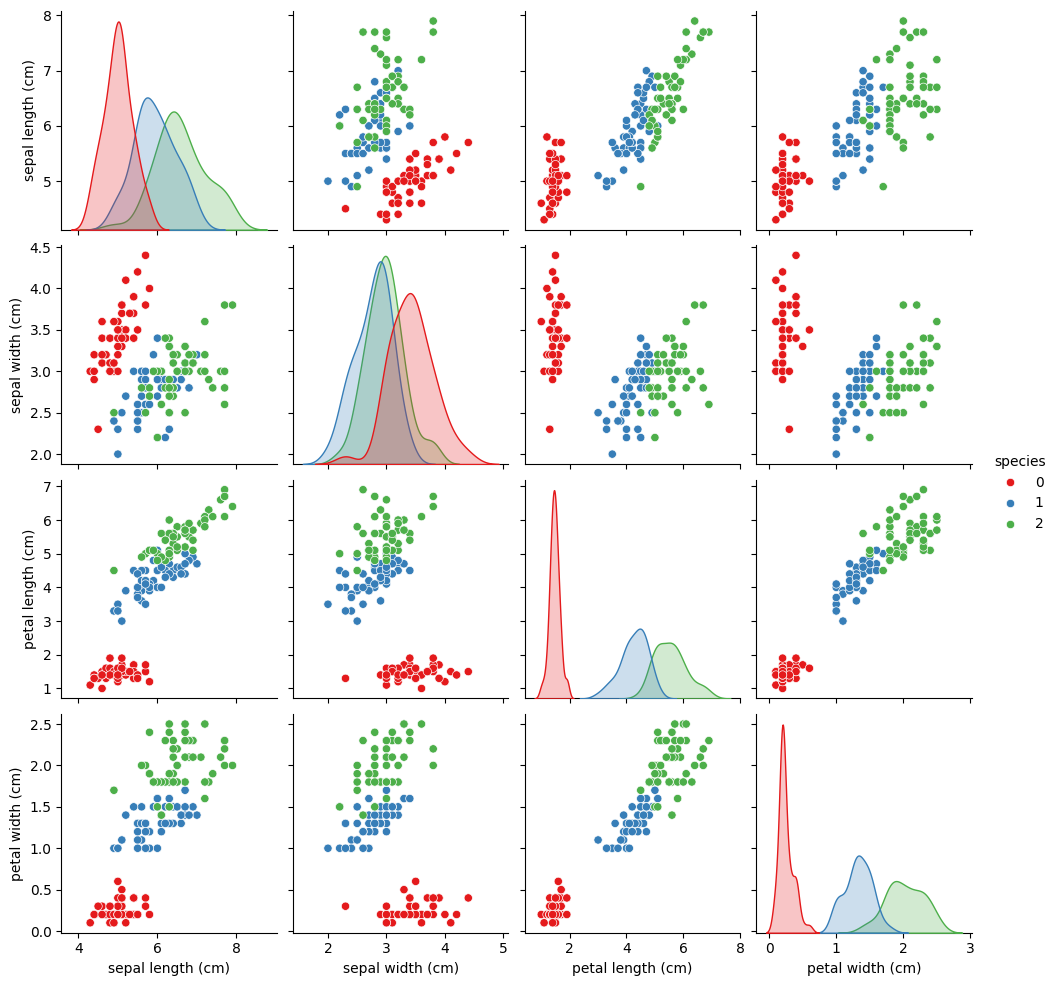

In [7]:
sns.pairplot(df,hue='species',palette='Set1',  diag_kind='kde',height=2.5)
plt.show()

C:\Users\gulab\AppData\Local\Temp\ipykernel_5960\497398503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette="Set2")
C:\Users\gulab\AppData\Local\Temp\ipykernel_5960\497398503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette="Set2")
C:\Users\gulab\AppData\Local\Temp\ipykernel_5960\497398503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette="Set2")
C:\Users\gulab\AppData\Local\Temp\ipykernel_5960\497398503.py:6: Fu

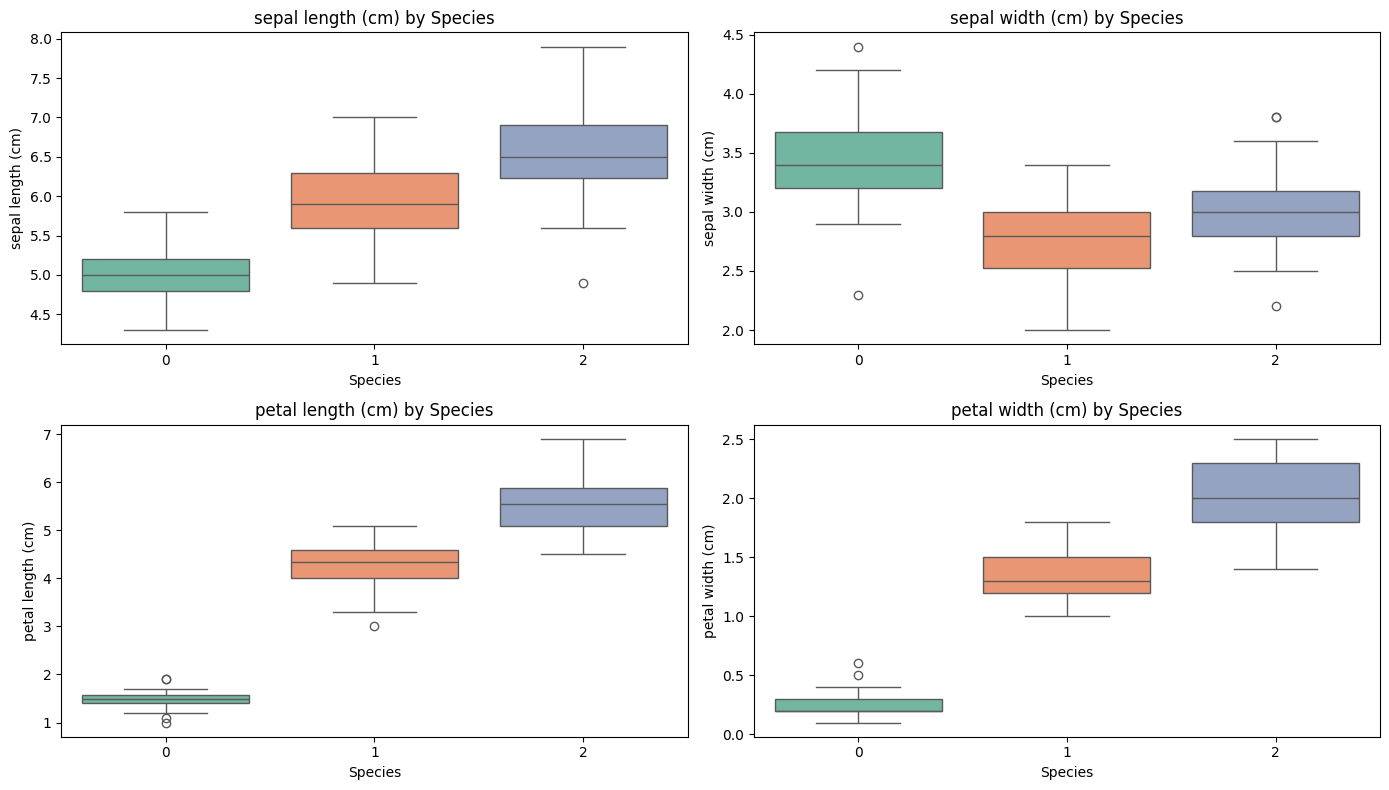

In [8]:
plt.figure(figsize=(14, 8))

features = iris.feature_names
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=df, palette="Set2")
    plt.title(f"{feature} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Prepare  Data

In [9]:
x=df.drop("species",axis=1)
y=df['species']


Spit the Data

In [10]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [12]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Sepal width (scaled)")

Logistic Regression

In [13]:
model1=LogisticRegression(multi_class='ovr')
model1.fit(x_train,y_train)

y_pred=model1.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Decission Trees


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


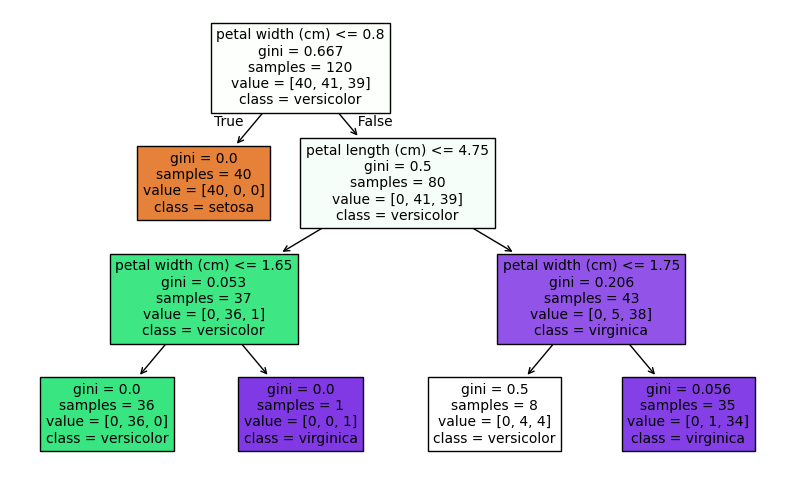

In [14]:
model2=DecisionTreeClassifier(max_depth=3)
model2.fit(x_train,y_train)

y_pred=model2.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
plot_tree(model2, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


SVM

In [15]:
model3=SVC(kernel='rbf',C=1,gamma='scale')
model3.fit(x_train,y_train)

y_pred=model3.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


KNN

In [ ]:
model4=KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')
model4.fit(x_train,y_train)

y_pred=model4.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))






Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


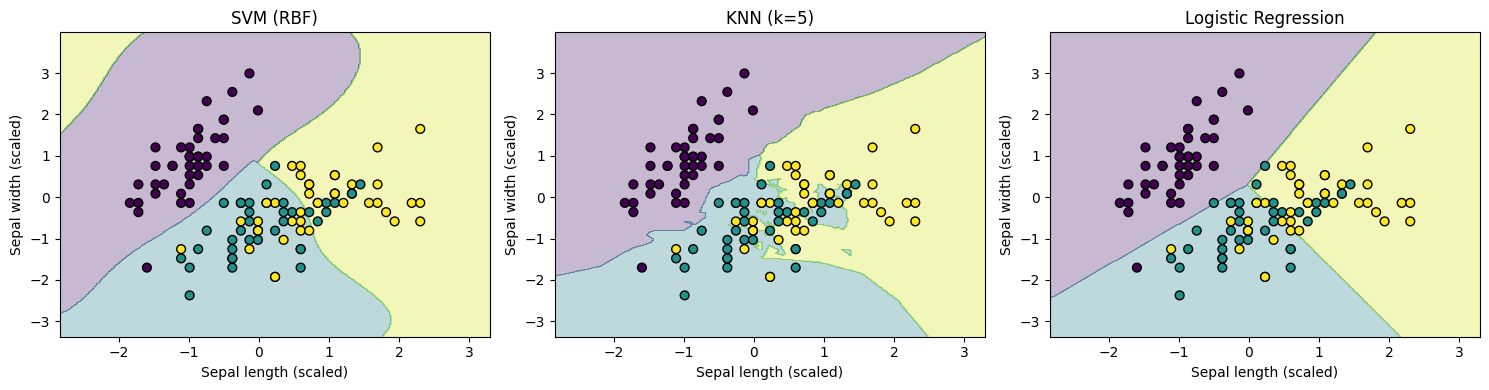

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM (RBF)": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(multi_class='ovr')
}

for name, model in models.items():
    model.fit(X_train, y_train)


plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plot_decision_boundary(model, X_train, y_train, name)

plt.tight_layout()
plt.show()


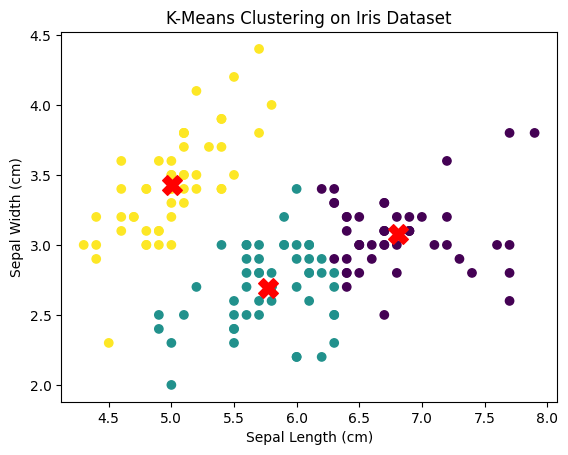

In [10]:
from sklearn.cluster import KMeans

X = iris.data[:, :2]  
df = pd.DataFrame(X, columns=['SepalLength', 'SepalWidth'])

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

df['Cluster'] = kmeans.labels_

plt.scatter(df['SepalLength'], df['SepalWidth'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='X', s=200, c='red')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset")
plt.show()